**Итоговая работа.**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
import math
from scipy.stats import norm
from scipy.optimize import curve_fit
%matplotlib inline
     

**Задание 1**\
Вычислите производную функции:

tg(sin(x)+cos(2x+3))

в точке X0 = 1

In [17]:
x = sym.Symbol('x')
yprime = sym.diff(sym.tan(sym.sin(x) + sym.cos(2*x + 3)), x)
yprime

(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)

In [20]:
x = 1
print('Значение первой производной в x=1:', round((-2*math.sin(2*x + 3) + math.cos(x))*((math.tan(math.sin(x))**2 + math.cos(2*x +3)) + 1), 2))

Значение первой производной в x=1: 6.23


**Задание 2**\
Дан объект в 2D пространстве

(-200.0, 200.0)

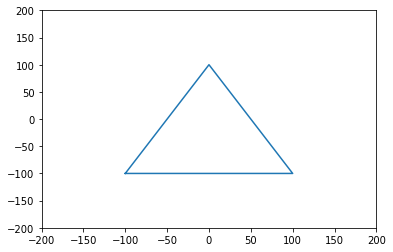

In [80]:
A = [[-100, -100, 1],
     [0, 100, 1],
     [100, -100, 1],
     [-100, -100, 1]]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

При помощи матричных операций выполните:

Масштабирование и смещение объекта (применить 2 матрицы трансформаций).\
Масштабирование на (0.5, 1.2) и смещение на (200, 300)

Масштабирование матрицы на (0.5, 1.2):

(-200.0, 200.0)

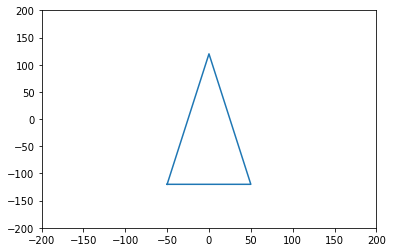

In [30]:
B = np.array([[0.5,0,0,0],
             [0,1.2,0,0],
             [0,0,1,0]])

C = A @ B
x = C[:,0]
y = C[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 


Cмещение матрицы на (200, 300)

(0.0, 350.0)

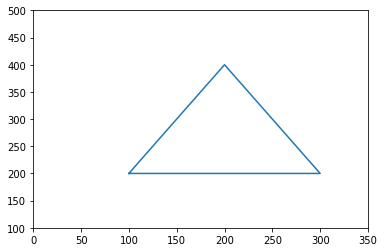

In [93]:
S = np.array([[1,0,0,0],
              [0,1,0,0],
              [200,300,1,0]])

C = A @ S

x = C[:,0]
y = C[:,1]
plt.plot(x, y)
plt.ylim([100, 500])
plt.xlim([0, 350]) 

**Задание 3**\
Найдите собственные значения и собственные вектора матрицы:

In [94]:
m = np.array([[1, 4],
              [1, 1]])
print(m)
     

[[1 4]
 [1 1]]


In [95]:
w, v = np.linalg.eig(m)
print('Собственные значения матрицы m:\n', w)
print('Собственные вектора матрицы m:\n', v)

Собственные значения матрицы m:
 [ 3. -1.]
Собственные вектора матрицы m:
 [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


**Задание 4**\
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x.

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

In [96]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [102]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

y = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

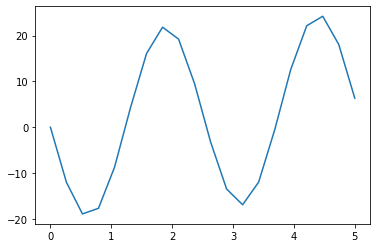

In [103]:
plt.plot(x, y)
plt.show()

In [110]:
popt, pcov = curve_fit(f, x, y, p0 = [0, 1])
print('a,b:', popt)
print('Матрица ковариации:\n', pcov)

a,b: [ 3.  -2.5]
Матрица ковариации:
 [[ 2.68953112e-18 -5.23196246e-20]
 [-5.23196246e-20  2.80481711e-19]]


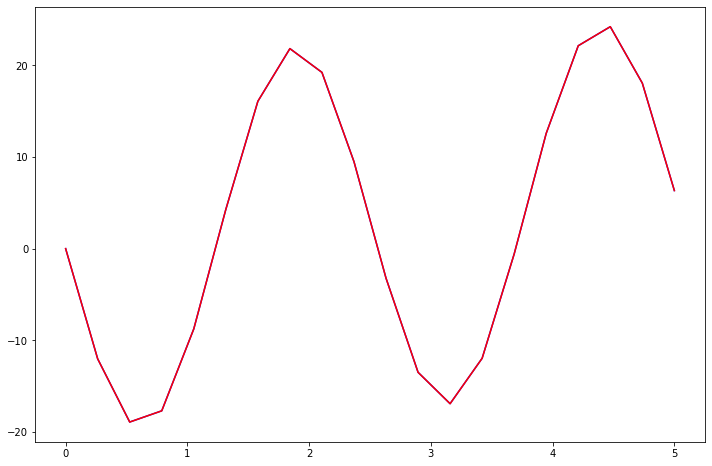

In [111]:
plt.figure(figsize=(12, 8))
plt.plot(x, y, color='blue')
a = popt[0]
b = popt[1]
plt.plot(x, f(x, a, b), color='red')
plt.show()

In [112]:
def error(params):
    return np.sum(np.abs(y - f(x, params[0], params[1])))

In [114]:
error(popt)

1.5365230368047378e-06

**Задание 5**\
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [3]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [38]:
nx = 0 #создаю счётчик для каждого пользователя x

for xn, user in enumerate(raitings):
    cosine_list = [] # список для сбора всех косинусных расстояний с каждым y
    
    for yn, u in enumerate(raitings):
        cosine = round(np.dot(user, u)/(np.linalg.norm(user)*np.linalg.norm(u)), 3) #считаем косинусное сходство с каждым y

        if xn != yn: # исключаем самого x
            cosine_list.append(cosine) #добавляем косинусные сходства всех y != x

    max_cosine = max(cosine_list) # находим максимум для каждого x
    res = [i for i, j in enumerate(cosine_list) if j == max_cosine] # находим индекс пользователя y с максимальных сходством
    nx += 1 #номер пользователя x
    ny = res[0] + 1 #номер пользователя y
    print(f'x{nx}, y{ny}')
    print(f'x{nx}: {user}, y{ny}: {raitings[res[0]]}, косинусное сходство: {max_cosine}')

x1, y8
x1: [ 4  4  9  4  1  6 10  7  9  6  9  2  8  6  6], y8: [ 4  1  6  4  3 10  4  4  2  8  7  9  3  8  3], косинусное сходство: 0.911
x2, y4
x2: [ 9  2  5 10  7  8 10  5  6  2  1  6  8  9  7], y4: [6 1 9 7 7 9 2 3 5 1 6 6 3 2 7], косинусное сходство: 0.871
x3, y9
x3: [ 1  6  8  8  4  9  3  8 10  5  2  6  8  1  6], y9: [ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4], косинусное сходство: 0.919
x4, y9
x4: [6 1 9 7 7 9 2 3 5 1 6 6 3 2 7], y9: [ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4], косинусное сходство: 0.859
x5, y8
x5: [ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6], y8: [ 4  1  6  4  3 10  4  4  2  8  7  9  3  8  3], косинусное сходство: 0.879
x6, y9
x6: [ 8  3  7  3  8  6  1  8  8  6  1  9  4 10  1], y9: [ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4], косинусное сходство: 0.855
x7, y4
x7: [ 9  8  4  8  8 10  6  1  1  2  9  5  2  7  2], y4: [6 1 9 7 7 9 2 3 5 1 6 6 3 2 7], косинусное сходство: 0.833
x8, y6
x8: [ 4  1  6  4  3 10  4  4  2  8  7  9  3  8  3], y6: [ 8  3  7  3  8 